In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Offer_Offer B,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,refundBinned_No Refund,refundBinned_Refund
0,0,1,0.872912,0,-0.650362,-1.278897,0,1,-0.612931,0,...,0,0,1,0,0,1,0,0,1,0
1,1,1,0.762181,1,-0.317162,-0.993672,1,1,-0.172164,0,...,0,1,1,0,0,0,1,0,1,0
2,2,1,-1.032322,0,-0.650362,-0.586209,1,1,1.541931,0,...,0,0,1,0,0,1,0,0,0,1
3,3,1,0.791766,1,-0.317162,-0.300984,0,1,-0.417035,0,...,0,0,1,0,0,1,0,0,0,1
4,4,1,-1.358595,1,-0.317162,0.187973,1,1,-0.319086,0,...,0,0,1,0,0,1,0,0,1,0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.15, train_size=None, random_state=None, shuffle=True, stratify=None)

In [7]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Offer_Offer B,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,refundBinned_No Refund,refundBinned_Refund
691,0.496767,1,2.681639,1.614096,1,1,0.464500,1,1,1,...,0,0,0,0,1,1,0,0,1,0
5179,1.286247,1,1.348838,-0.993672,0,1,1.590905,0,1,0,...,0,1,1,0,0,1,0,0,1,0
1433,1.044501,0,-0.650362,-1.278897,0,0,-1.004724,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6260,-1.080502,0,-0.650362,-1.197404,0,1,0.317577,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6787,-1.438896,1,2.681639,-0.504716,0,0,-1.004724,0,0,0,...,0,0,1,0,0,0,1,0,1,0


#### Basic Algorithms

We start with some basic algorithms such as linear regression and random forests.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
seed = 0
# Logistic Regression
logreg = LogisticRegression(max_iter = 2000)

# Support Vector Machines
sup_vec = SVC(gamma = "auto")

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state = seed, n_estimators = 100)

# KNN
knn = KNeighborsClassifier()

# Gaussian Naive Bayes
gauss_bayes = GaussianNB()

# Decision Tree Classifier
dec_tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)

# Gradient Boosting Classifier
grad_boost = GradientBoostingClassifier(random_state = 0)

# Adaboost Classifier
adaboost = AdaBoostClassifier(random_state = 0)

# ExtraTrees Classifier
extra_trees = ExtraTreesClassifier(random_state = 0)




modelNames = ["Logistic Regression", "Support vector machines", "Random forests", "KNN", "Gaussian Naive Bayes", "Decision Trees", "Gradient Boosting Classifier", "Adaboost Classifier", "ExtraTrees Classifier"]
models = [logreg, sup_vec, random_forest, knn, gauss_bayes, dec_tree, grad_boost, adaboost, extra_trees]


In [10]:
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    
    model.fit(training_features, training_target)
    accuracy = model.score(testing_features, testing_target)
    accuracy = round(accuracy*100, 2)
    return accuracy



In [11]:
scores = [calculateTrainAccuracy(model) for model in models]
Accuracy = pd.DataFrame(scores, columns = ["Accuracy"], index=modelNames)
sorted_accuracy = Accuracy.sort_values(by="Accuracy", ascending=False)
display(sorted_accuracy)

,Accuracy
Gradient Boosting Classifier,84.96
Random forests,84.01
Support vector machines,83.82
Logistic Regression,83.63
Adaboost Classifier,83.16
ExtraTrees Classifier,82.78
Decision Trees,81.17
KNN,79.85
Gaussian Naive Bayes,79.38


In [12]:
df.head().T

,0,1,2,3,4
Churn Label,1.000000,1.000000,1.000000,1.000000,1.000000
CLTV,0.872912,0.762181,-1.032322,0.791766,-1.358595
Referred a Friend,0.000000,1.000000,0.000000,1.000000,1.000000
Number of Referrals,-0.650362,-0.317162,-0.650362,-0.317162,-0.317162
Tenure in Months,-1.278897,-0.993672,-0.586209,-0.300984,0.187973
Multiple Lines,0.000000,1.000000,1.000000,0.000000,1.000000
Internet Service,1.000000,1.000000,1.000000,1.000000,1.000000
Avg Monthly GB Download,-0.612931,-0.172164,1.541931,-0.417035,-0.319086
Online Security,0.000000,0.000000,0.000000,0.000000,0.000000
Online Backup,0.000000,1.000000,0.000000,1.000000,0.000000


In [13]:
from sklearn.model_selection import cross_val_score
def Train_val_score(model):
    """Returns models' cross validation scores."""
    
    Training_cross_val = cross_val_score(model, testing_features,testing_target, cv = 10, scoring="accuracy").mean()
    Training_cross_val = round(Training_cross_val*100, 2)
    return Training_cross_val

# Calculate cross validation scores of all the models and store them in a dataframe
cross_scores = [Train_val_score(model) for model in models]
Training_cross_val = pd.DataFrame(cross_scores, columns = ["Train_cross_val"], index=modelNames)
sorted_cross_val = Training_cross_val.sort_values(by="Train_cross_val", ascending=False)
display(sorted_cross_val)

,Train_cross_val
Logistic Regression,83.54
Random forests,83.53
ExtraTrees Classifier,82.87
Gradient Boosting Classifier,82.78
Support vector machines,82.12
Adaboost Classifier,81.92
Decision Trees,79.46
Gaussian Naive Bayes,78.51
KNN,77.95


In [17]:
"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[1000]}

"""For GBC, the following hyperparameters are usually tunned."""
gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
              "max_depth": [4, 6, 8],
              "max_features": [1.0, 0.3, 0.1], 
              "min_samples_split": [ 2, 3, 4],
              "random_state":[seed]}
svcParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}
"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}

"""For KNN, the following hyperparameters are usually tunned."""
knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}
"""For ABC, the following hyperparameters are usually tunned."""
abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[seed]}

"""For ETC, the following hyperparameters are usually tunned."""
etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"], 
              "random_state":[seed]}


In [18]:
from sklearn.model_selection import GridSearchCV
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    # Construct grid search object with 10 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(training_features, training_target)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams


In [23]:
"""Due to computational restrictions, I won't optimise xgbc's hyperparameters."""
modelNamesToTune = [x for x in modelNames if x not in ["GNB","XGBC"]]
modelsToTune = [logreg, sup_vec, random_forest, knn, dec_tree, grad_boost, adaboost, extra_trees]
parametersLists = [lrParams, svcParams, rfParams, knnParams, dtParams, gbcParams, abcParams, etcParams]
modelNamesToTune.remove("Gaussian Naive Bayes")

bestScoreAndHyperparameters = [(84.19, {'C': 166.81005372000593, 'max_iter': 2000, 'penalty': 'l2'}),
 (85.13, {'C': 10.0, 'kernel': 'rbf'}),
 (85.04,
  {'criterion': 'entropy',
   'max_features': 'log2',
   'min_samples_leaf': 2,
   'min_samples_split': 6,
   'n_estimators': 25,
   'random_state': 44}),
 (81.74,
  {'algorithm': 'auto',
   'leaf_size': 1,
   'n_neighbors': 8,
   'weights': 'uniform'}),
 (78.88,
  {'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 2,
   'random_state': 0}),
 (85.41,
  {'learning_rate': 0.02,
   'max_depth': 8,
   'max_features': 0.3,
   'min_samples_split': 3,
   'random_state': 0}),
 (84.7, {'learning_rate': 0.2, 'n_estimators': 160, 'random_state': 0}),
 (84.79,
  {'bootstrap': False,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 10,
   'min_samples_leaf': 10,
   'min_samples_split': 2,
   'n_estimators': 300,
   'random_state': 0})]

In [26]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

,tunedAccuracy
Gradient Boosting Classifier,85.41
Support vector machines,85.13
Random forests,85.04
ExtraTrees Classifier,84.79
Adaboost Classifier,84.70
Logistic Regression,84.19
KNN,81.74
Decision Trees,78.88


In [36]:
"""Instantiate the models with optimized hyperparameters."""
# Sort the dataframe by index and select bestHyperparameters column
tunedParams = bestScoreAndHyperparametersSorted.sort_index().loc[:,"bestHyperparameters"]
adaboost = AdaBoostClassifier(**tunedParams["Adaboost Classifier"])
dec_tree  = DecisionTreeClassifier(**tunedParams["Decision Trees"])
extra_trees = ExtraTreesClassifier(**tunedParams["ExtraTrees Classifier"])
grad_boost = GradientBoostingClassifier(**tunedParams["Gradient Boosting Classifier"])
knn = KNeighborsClassifier(**tunedParams["KNN"])
logreg  = LogisticRegression(**tunedParams["Logistic Regression"])
random_forest  = RandomForestClassifier(**tunedParams["Random forests"])
sup_vec = SVC(**tunedParams["Support vector machines"])


['Logistic Regression', 'Support vector machines', 'Random forests', 'KNN', 'Gaussian Naive Bayes', 'Decision Trees', 'Gradient Boosting Classifier', 'Adaboost Classifier', 'ExtraTrees Classifier']


In [43]:
"""Train all the models with optimised hyperparameters."""
models = [adaboost, dec_tree, extra_trees, grad_boost, knn, logreg, random_forest, sup_vec]
modelNames = tunedParams.index.values
xValScore = []
for name, model in zip(modelNames, models):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    model.fit(training_features, training_target)
    scores = cross_val_score(model, training_features, training_target, cv = 10, scoring="accuracy")*100
    xValScore.append(scores.mean())
    print("Mean Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), name))

Mean Accuracy: 84.4302 (+/- 1.4587) [Adaboost Classifier]
Mean Accuracy: 80.1876 (+/- 1.4595) [Decision Trees]
Mean Accuracy: 85.0651 (+/- 1.1038) [ExtraTrees Classifier]
Mean Accuracy: 85.1652 (+/- 1.4045) [Gradient Boosting Classifier]
Mean Accuracy: 81.9579 (+/- 1.7590) [KNN]
Mean Accuracy: 84.3304 (+/- 1.2684) [Logistic Regression]
Mean Accuracy: 84.5806 (+/- 1.4763) [Random forests]
Mean Accuracy: 84.1799 (+/- 1.3803) [Support vector machines]


In [48]:
"""Make prediction using all the trained models."""
modelPrediction = pd.DataFrame({"RF":random_forest.predict(testing_features),
                                 "GBC":grad_boost.predict(testing_features),
                                 "ABC":adaboost.predict(testing_features),
                                 "ETC":extra_trees.predict(testing_features), 
                                 "DT":dec_tree.predict(testing_features),
                                 "SVC":sup_vec.predict(testing_features), 
                                 "KNN":knn.predict(testing_features), 
                                 "LR":logreg.predict(testing_features)
                                })

"""Let"s see how each model classifies a prticular class."""
display(modelPrediction.head())

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,1
4,1,1,1,1,0,1,1,1


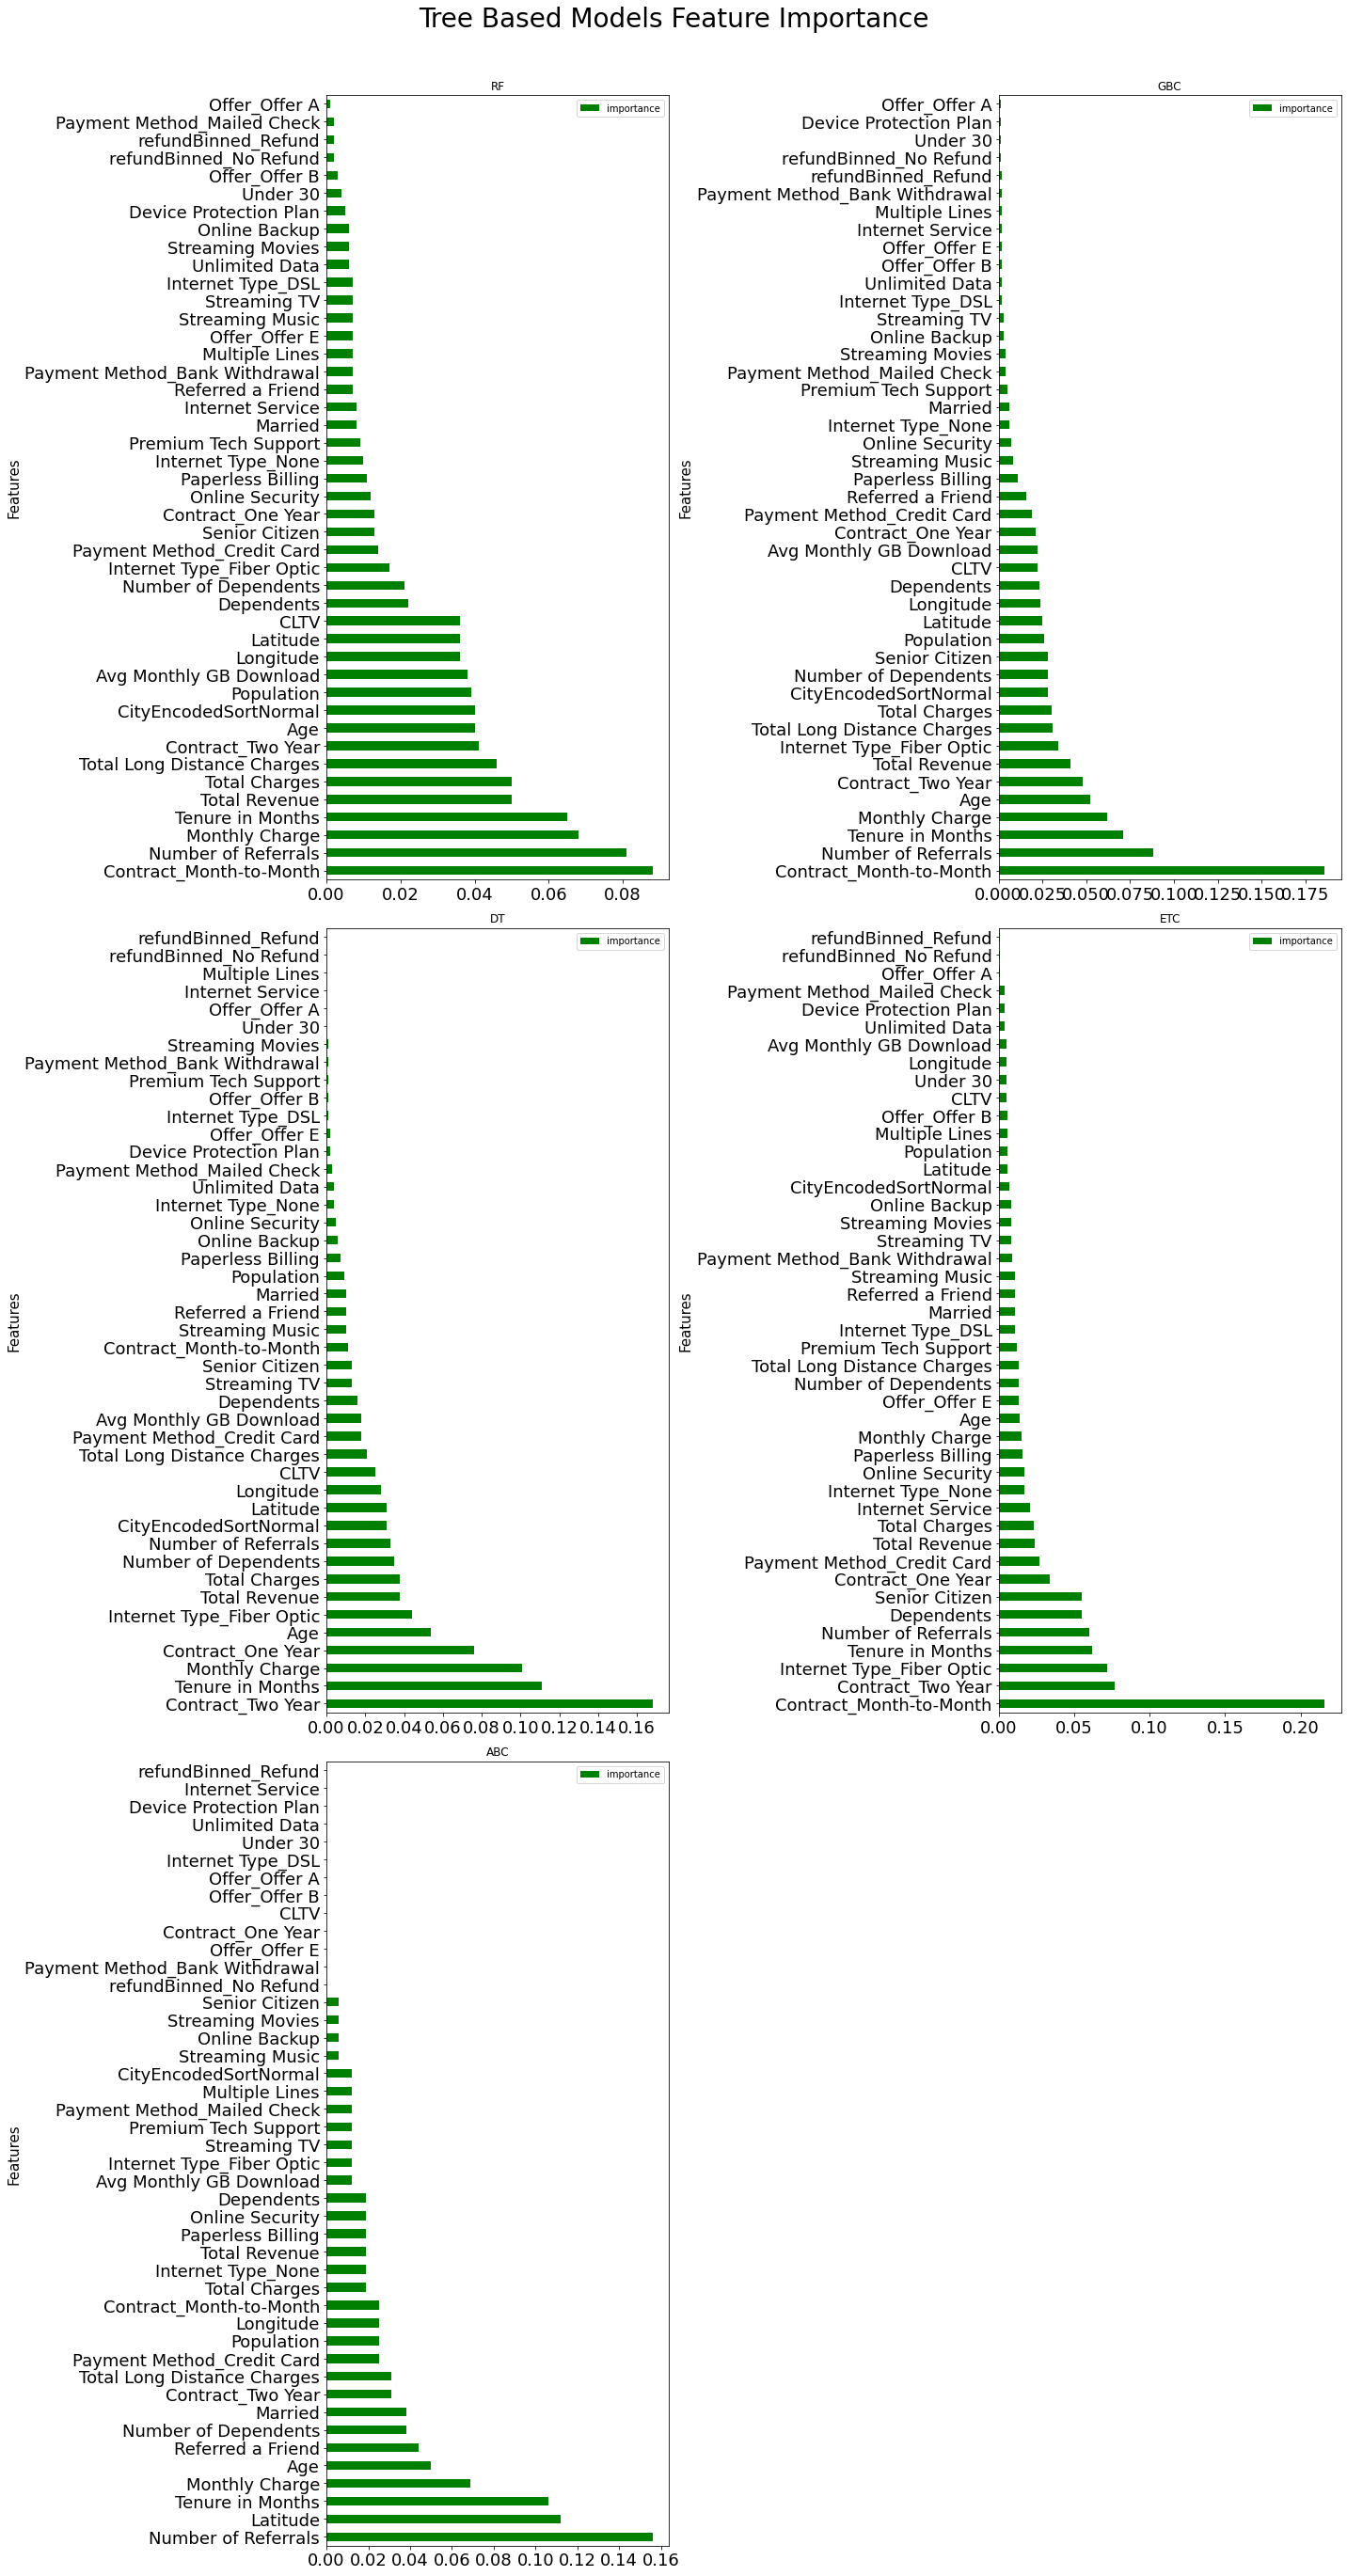

In [51]:
"""Create a function that plot feature importance by the selected tree based models."""
def plotFeatureImportance(model):
    """Return a plot of feature importance by model."""
    
    importance = pd.DataFrame({"feature": training_features.columns,
                              "importance": np.round(model.feature_importances_,3)})
    importanceSorted = importance.sort_values(by = "importance", ascending = False).set_index("feature")
    return importanceSorted

"""Create subplots of feature impotance of rf, gbc, dt, etc, and abc."""
fig, axes = plt.subplots(3,2, figsize = (20,40))
fig.suptitle("Tree Based Models Feature Importance", fontsize = 28)
treeModels = [random_forest, grad_boost, dec_tree, extra_trees, adaboost]
treeModelNames = ["RF", "GBC", "DT", "ETC", "ABC"]
for ax, model, name in zip(axes.flatten(), treeModels, treeModelNames):
    plotFeatureImportance(model).plot.barh(ax=ax, title=name, fontsize=18, color="green")
    ax.set_ylabel("Features", fontsize = 15)
fig.delaxes(ax = axes[2,1]) # We don"t need the last subplot.
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

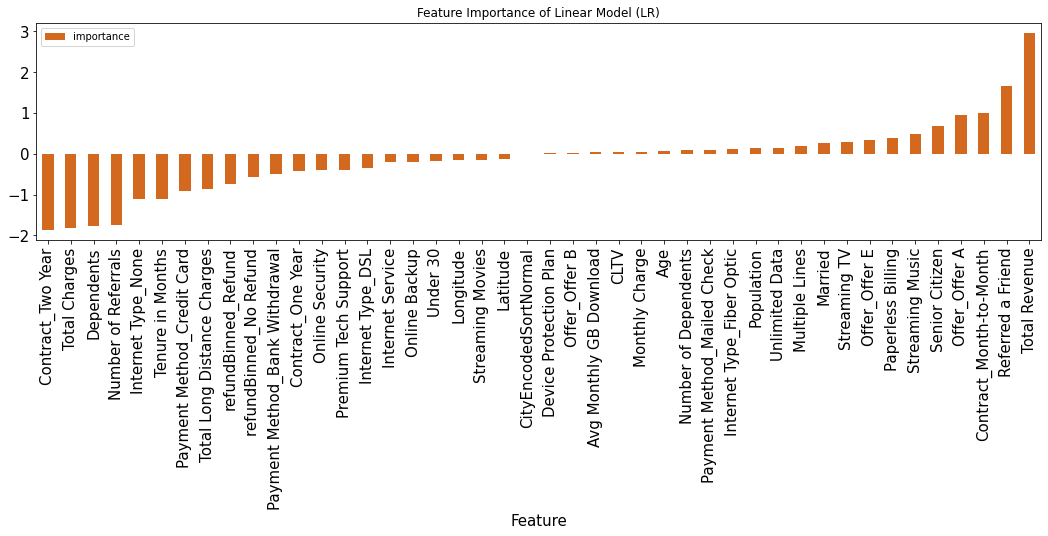

In [54]:
"""Let's plot feature importance of LR."""
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":training_features.columns,
                      "importance":np.transpose(logreg.coef_[0])})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of Linear Model (LR)", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

In [58]:
"""Create a function that returns learning curves for different classifiers."""
from sklearn.model_selection import learning_curve
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = training_features, training_target
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")
    
    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

In [ ]:
 """Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [random_forest, grad_boost, dec_tree, extra_trees, adaboost, knn, sup_vec, logreg]
lcLabels = ["RF", "GBC", "DT", "ETC", "ABC", "KNN", "SVC", "LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])